<a href="https://colab.research.google.com/github/Judyxyang/Intrusion-Detection-System-Data-Analysis-Using-Combined-Algorithm/blob/main/Score95_UNSW_NB15_Complete_PCA_KNN_Test_Data_for_Conference_paper_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from pandas.plotting import scatter_matrix
from google.colab import files
uploaded=files.upload


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/MyDrive/ConferenceGriffith'

'35 Feature Importance List .csv'
'Complete coding for Conference_KNN_10052021.ipynb'
'Complete coding for Conference_KNN_12052021.ipynb'
'download (1).png'
'download (2).png'
 download.png
'Processed Complete PCA and Anormal &Normal PCA12052021.ipynb'
'Processed UNSW-NB15_PCA_Normal_Anormal Analysis_12052021.ipynb'
'Score95_UNSW-NB15 Complete PCA KNN Test Data for Conference paper .ipynb'
'UNSW-NB15-1.csv-Complete Data Preprocessing to PCA _13052021.ipynb'
 UNSW-NB15_1NN_30Fnew.csv
 UNSW-NB15_1NN_30F_OneHot_targets.csv
 UNSW-NB15_1NN_35F_OneHot.csv
 UNSW-NB15_1NN_35F_OneHot_targets.csv
 UNSW-NB15_1NN_40F_OneHot.csv
 UNSW-NB15_1NN_41F.csv
 UNSW-NB15_1NN_50F_OneHote.csv
 UNSW-NB15_1NN_50_OneHot.csv
 UNSW-NB15_30F_Anormal_Hotcode.csv
 UNSW-NB15_30F_Normal_Hotcode.csv
 UNSW-NB15_30F_X_1_OneHot.csv
 UNSW-NB15_40F_Anormal_Hotcode.csv
 UNSW-NB15_40F_Normal_Hotcode.csv
 UNSW-NB15_Anomral_30F_OneHot_targets.csv
 UNSW-NB15_Anormal.csv
 UNSW-NB15_Anormal_OneHot.csv
 UNSW-NB15_Nomral_30F_OneHot_t

In [ ]:
# load sklearn dataset
data=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_50F_OneHote.csv', low_memory=False)

In [ ]:
data.head()

,Unnamed: 0,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,...,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Normal,Reconnaissance,Shellcode,Worms
0,0,0.036133,528,304,31,29,0,0,87676.08594,50480.17188,...,0,0,0,0,0,0,1,0,0,0
1,1,0.001119,146,178,31,29,0,0,521894.53130,636282.37500,...,0,0,0,0,0,0,1,0,0,0
2,2,0.001209,132,164,31,29,0,0,436724.56250,542597.18750,...,0,0,0,0,0,0,1,0,0,0
3,3,0.001169,146,178,31,29,0,0,499572.25000,609067.56250,...,0,0,0,0,0,0,1,0,0,0
4,4,0.078339,568,312,31,29,0,0,43503.23438,23896.14258,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
data=data.drop(['Unnamed: 0'],axis=1)

In [ ]:
data.shape

(700000, 50)

In [ ]:
# Balance Dataset into Normal and Abnormal

In [ ]:
data_normal=data.loc[data['Normal']==1]

In [ ]:
data_normal.shape

(677785, 50)

In [ ]:
data_normal_30=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_30F_OneHot_targets.csv')

In [ ]:
data_normal_30.columns

Index(['Unnamed: 0', 'sbytes', 'dbytes', 'sttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'smeansz', 'dmeansz',
       'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Ltime', 'Dintpkt',
       'tcprtt', 'synack', 'is_sm_ips_ports', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'Normal', ' Fuzzers',
       'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic', 'Reconnaissance',
       'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [ ]:
data_anormal=data_normal_30.loc[data['Normal']==0]

In [ ]:
data_anormal.shape

(22215, 42)

In [ ]:
data_anormal.columns

Index(['Unnamed: 0', 'sbytes', 'dbytes', 'sttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'smeansz', 'dmeansz',
       'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Ltime', 'Dintpkt',
       'tcprtt', 'synack', 'is_sm_ips_ports', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'Normal', ' Fuzzers',
       'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic', 'Reconnaissance',
       'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [ ]:
data_anormal=data_anormal.to_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_30F_Anormalwith10targets_OneHot.csv')

# 30 Features Split X, y

In [ ]:
data_normal_30.shape

(700000, 42)

In [ ]:
#Select the first 30 columns as features 
X_1=data_normal_30.iloc[:,1:31]
#Slecte the 41-50 columns as targets 
y_1=data_normal_30.iloc[:,31:41]

In [ ]:
X_1.columns

Index(['sbytes', 'dbytes', 'sttl', 'sloss', 'dloss', 'Sload', 'Dload', 'Spkts',
       'Dpkts', 'swin', 'dwin', 'smeansz', 'dmeansz', 'trans_depth',
       'res_bdy_len', 'Sjit', 'Djit', 'Ltime', 'Dintpkt', 'tcprtt', 'synack',
       'is_sm_ips_ports', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm'],
      dtype='object')

In [ ]:
y_1.columns

Index(['Normal', ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits',
       'Generic', 'Reconnaissance', 'Shellcode', 'Worms'],
      dtype='object')

# Load Anormal Dataset

In [ ]:
data_anormal=pd.read_csv('/content/gdrive/MyDrive/ConferenceGriffith/UNSW-NB15_1NN_30F_Anormalwith10targets_OneHot.csv')

In [ ]:
data_anormal.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'sbytes', 'dbytes', 'sttl', 'sloss',
       'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Ltime',
       'Dintpkt', 'tcprtt', 'synack', 'is_sm_ips_ports', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'Normal', ' Fuzzers',
       'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic', 'Reconnaissance',
       'Shellcode', 'Worms', 'Label'],
      dtype='object')

In [ ]:
data_anormal=data_anormal.drop(['Unnamed: 0.1'],axis=1)

In [ ]:
data_anormal.shape

(22215, 42)

In [ ]:
#Select the first 40 columns as features 
X_2=data_anormal.iloc[:,1:31]
#Slecte the 41-50 columns as targets 
y_2=data_anormal.iloc[:,31:41]

#Anomral Activity Data Split 

In [ ]:
X_3=data_anormal.iloc[:,1:31]

In [ ]:
y_3=y_2=data_anormal.iloc[:,32:41]
y_3.shape

(22215, 9)

# PCA Dimensionality Reduciton Based on # 31 Feaures
# Normal Activity 

In [ ]:
# Data stadanrdisation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X_1=np.array(X_1)


In [ ]:
y_1=np.array(y_1)

In [ ]:
X_2=np.array(X_2)


In [ ]:
y_2=np.array(y_2)

In [ ]:
X_3=np.array(X_3)


In [ ]:
y_3=np.array(y_3)

In [ ]:
#Standardizing the features
X_1=StandardScaler().fit_transform(X_1)


array([[-0.09981682, -0.25813506, -0.18786077, ..., -0.39826458,
        -0.36637065, -0.28184276],
       [-0.10832487, -0.25881229, -0.18786077, ..., -0.63694707,
         0.16808801, -0.28184276],
       [-0.10863668, -0.25888754, -0.18786077, ..., -0.87562956,
        -0.36637065, -0.28184276],
       ...,
       [-0.06351286, -0.24652538, -0.18786077, ...,  0.55646538,
         0.16808801, -0.28184276],
       [-0.09892593, -0.25813506, -0.18786077, ...,  0.0791004 ,
        -0.36637065, -0.28184276],
       [-0.01718633,  0.06695753, -0.18786077, ...,  0.55646538,
        -0.36637065, -0.28184276]])

In [ ]:
X_2=StandardScaler().fit_transform(X_2)


array([[-0.05116214, -0.05839909,  0.43468868, ..., -0.94960919,
        -0.79592034, -0.75735414],
       [-0.05037428,  0.09388357, -2.2866647 , ..., -0.94960919,
        -0.79592034, -0.75735414],
       [-0.04853316, -0.05680189,  0.43468868, ..., -0.94960919,
        -0.79592034, -0.75735414],
       ...,
       [-0.04950348, -0.05469215,  0.43468868, ..., -0.58505654,
        -0.34948873, -0.75735414],
       [-0.05223198, -0.05628936,  0.43468868, ..., -0.58505654,
        -0.34948873, -0.75735414],
       [-0.05190025, -0.05680189,  0.43468868, ..., -0.22050389,
         0.09694288, -0.75735414]])

In [ ]:
# Normal Activity Data PCA Dimensionality Reduction 

In [ ]:
#29 Features 
pca = PCA(n_components=29)
principalComponents_normal_29 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([1.81616171e-01, 1.11659162e-01, 8.05736049e-02, 7.94319263e-02,
       7.40044653e-02, 6.76953770e-02, 4.43425538e-02, 4.18501853e-02,
       3.77008630e-02, 3.42369905e-02, 3.29365484e-02, 3.11463362e-02,
       2.86867014e-02, 2.27292645e-02, 2.22981214e-02, 1.86652851e-02,
       1.82146606e-02, 1.49169536e-02, 1.37414790e-02, 1.27611207e-02,
       8.30822308e-03, 6.53104150e-03, 5.75992469e-03, 5.40703839e-03,
       2.62217766e-03, 1.79000802e-03, 2.23638226e-04, 8.34456540e-05,
       5.30869504e-05])

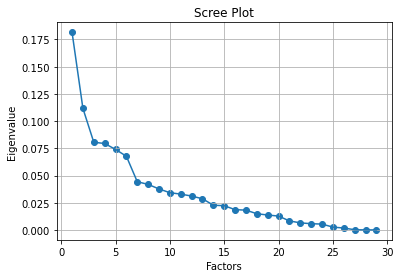

In [ ]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,30),importance)
plt.plot(range(1,30),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

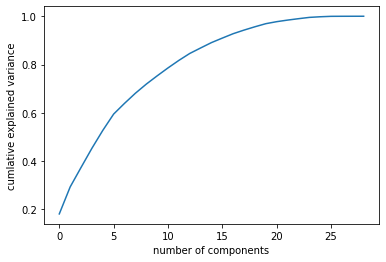

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [ ]:
a=np.cumsum(pca.explained_variance_ratio_)
a

array([0.18161617, 0.29327533, 0.37384894, 0.45328087, 0.52728533,
       0.59498071, 0.63932326, 0.68117345, 0.71887431, 0.7531113 ,
       0.78604785, 0.81719418, 0.84588089, 0.86861015, 0.89090827,
       0.90957356, 0.92778822, 0.94270517, 0.95644665, 0.96920777,
       0.97751599, 0.98404704, 0.98980696, 0.995214  , 0.99783618,
       0.99962618, 0.99984982, 0.99993327, 0.99998636])

In [ ]:
# Feature 19

In [ ]:
pca = PCA(n_components=19)
principalComponents_normal_19 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.18161617, 0.11165916, 0.0805736 , 0.07943193, 0.07400447,
       0.06769538, 0.04434255, 0.04185019, 0.03770086, 0.03423699,
       0.03293655, 0.03114634, 0.0286867 , 0.02272926, 0.02229812,
       0.01866529, 0.01821466, 0.01491695, 0.01374148])

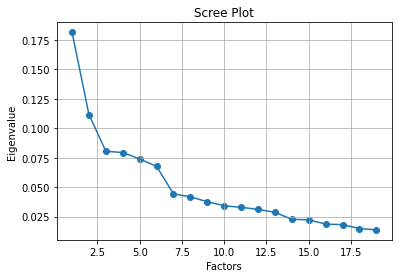

In [ ]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,20),importance)
plt.plot(range(1,20),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

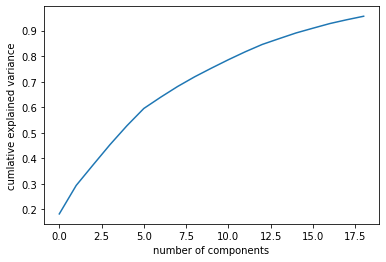

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [ ]:
b=np.cumsum(pca.explained_variance_ratio_)
b

array([0.18161617, 0.29327533, 0.37384894, 0.45328087, 0.52728533,
       0.59498071, 0.63932326, 0.68117345, 0.71887431, 0.7531113 ,
       0.78604785, 0.81719418, 0.84588089, 0.86861015, 0.89090827,
       0.90957356, 0.92778822, 0.94270517, 0.95644665])

In [ ]:
# Normal Feature 15

In [ ]:
pca = PCA(n_components=15)
principalComponents_normal_15 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.18161617, 0.11165916, 0.0805736 , 0.07943193, 0.07400447,
       0.06769538, 0.04434255, 0.04185019, 0.03770086, 0.03423699,
       0.03293655, 0.03114634, 0.0286867 , 0.02272926, 0.02229812])

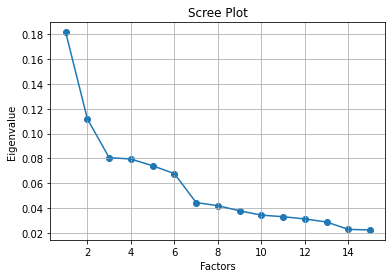

In [ ]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,16),importance)
plt.plot(range(1,16),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

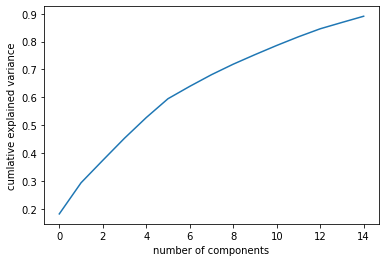

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [ ]:
c=np.cumsum(pca.explained_variance_ratio_)
c

array([0.18161617, 0.29327533, 0.37384894, 0.45328087, 0.52728533,
       0.59498071, 0.63932326, 0.68117345, 0.7188743 , 0.75311129,
       0.78604783, 0.81719416])

In [ ]:
# Feature 12 

In [ ]:
pca = PCA(n_components=12)
principalComponents_normal_12 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.18161617, 0.11165916, 0.0805736 , 0.07943193, 0.07400447,
       0.06769538, 0.04434255, 0.04185018, 0.03770086, 0.03423699,
       0.03293654, 0.03114626])

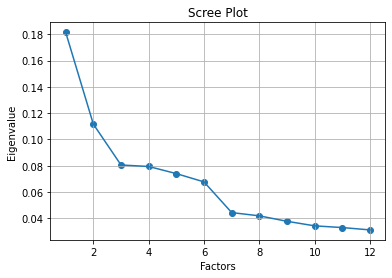

In [ ]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,13),importance)
plt.plot(range(1,13),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

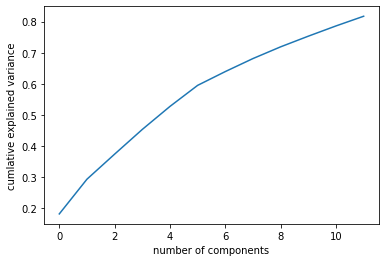

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [ ]:
d=np.cumsum(pca.explained_variance_ratio_)
d

array([0.18161617, 0.29327533, 0.37384894, 0.45328087, 0.52728533,
       0.59498071, 0.63932326, 0.68117344, 0.71887431, 0.75311129,
       0.78604784, 0.81719416])

In [ ]:
#Normal Feature 9

In [ ]:
pca = PCA(n_components=9)
principalComponents_normal_9 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.18161617, 0.11165916, 0.0805736 , 0.07943192, 0.07400446,
       0.06769535, 0.04433974, 0.04185017, 0.03770055])

In [ ]:
print(principalComponents_normal_9.shape)

(700000, 9)


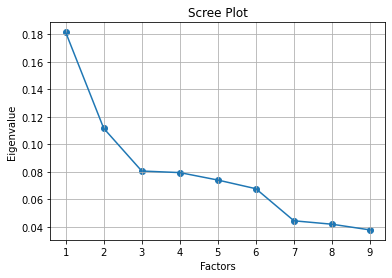

In [ ]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,10),importance)
plt.plot(range(1,10),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

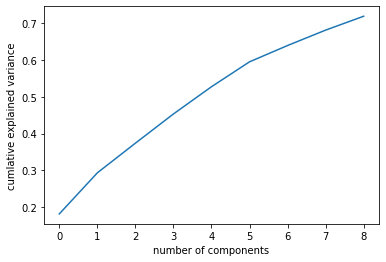

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [ ]:
e=np.cumsum(pca.explained_variance_ratio_)
e

array([0.18161617, 0.29327533, 0.37384893, 0.45328085, 0.52728531,
       0.59498066, 0.6393204 , 0.68117057, 0.71887113])

# PCA Dimensionality Reduciton Based on # 30 Feaures
# Anormal Activity 

In [ ]:
# 29 Feature 

In [ ]:
pca = PCA(n_components=29)
principalComponents_anormal_29 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([2.69497353e-01, 1.21216362e-01, 1.03523697e-01, 8.72875661e-02,
       6.83058827e-02, 5.46527794e-02, 4.67508561e-02, 3.98425472e-02,
       3.51690985e-02, 3.15703487e-02, 2.88007208e-02, 2.33493010e-02,
       1.98924034e-02, 1.75415440e-02, 1.39344418e-02, 1.05315230e-02,
       8.39173191e-03, 6.65301020e-03, 4.66428250e-03, 2.50477417e-03,
       1.75490242e-03, 1.38528304e-03, 1.33261519e-03, 1.17323837e-03,
       1.67682973e-04, 4.73943591e-05, 3.65181406e-05, 1.58146345e-05,
       6.32719214e-06])

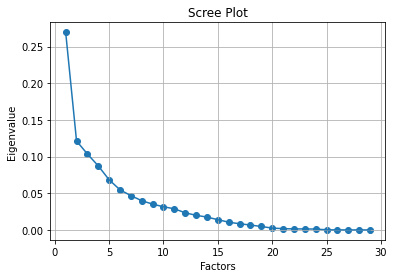

In [ ]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,30),importance)
plt.plot(range(1,30),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

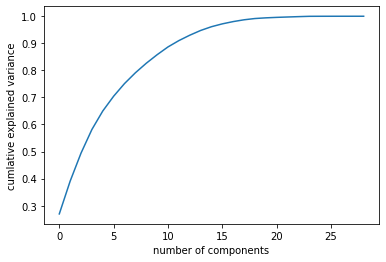

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [ ]:
a_1=np.cumsum(pca.explained_variance_ratio_)
a_1

array([0.26949735, 0.39071372, 0.49423741, 0.58152498, 0.64983086,
       0.70448364, 0.7512345 , 0.79107704, 0.82624614, 0.85781649,
       0.88661721, 0.90996651, 0.92985892, 0.94740046, 0.9613349 ,
       0.97186642, 0.98025816, 0.98691117, 0.99157545, 0.99408022,
       0.99583513, 0.99722041, 0.99855302, 0.99972626, 0.99989395,
       0.99994134, 0.99997786, 0.99999367, 1.        ])

In [ ]:
#Feature 19

In [ ]:
pca = PCA(n_components=19)
principalComponents_anormal_19 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.26949735, 0.12121636, 0.1035237 , 0.08728757, 0.06830588,
       0.05465278, 0.04675086, 0.03984255, 0.0351691 , 0.03157035,
       0.02880072, 0.0233493 , 0.0198924 , 0.01754154, 0.01393444,
       0.01053152, 0.00839173, 0.00665301, 0.00466428])

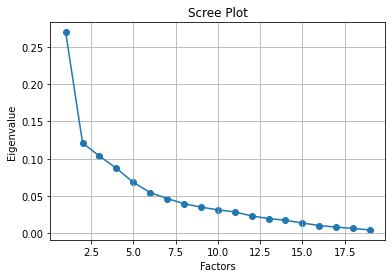

In [ ]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,20),importance)
plt.plot(range(1,20),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

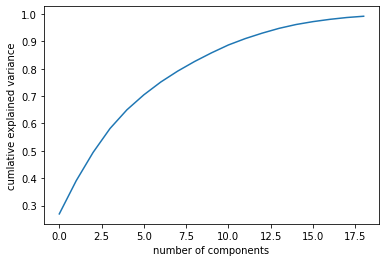

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [ ]:
b_1=np.cumsum(pca.explained_variance_ratio_)
b_1

array([0.26949735, 0.39071372, 0.49423741, 0.58152498, 0.64983086,
       0.70448364, 0.7512345 , 0.79107704, 0.82624614, 0.85781649,
       0.88661721, 0.90996651, 0.92985892, 0.94740046, 0.9613349 ,
       0.97186642, 0.98025816, 0.98691117, 0.99157545])

In [ ]:
#15 Feature 

In [ ]:
pca = PCA(n_components=15)
principalComponents_anormal_15 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.26949735, 0.12121636, 0.1035237 , 0.08728757, 0.06830588,
       0.05465278, 0.04675086, 0.03984255, 0.0351691 , 0.03157035,
       0.02880072, 0.0233493 , 0.0198924 , 0.01754154, 0.01393444])

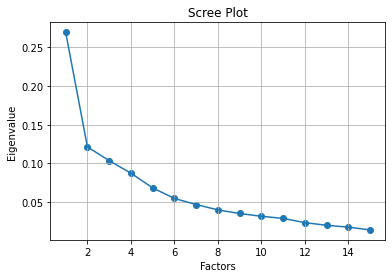

In [ ]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,16),importance)
plt.plot(range(1,16),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

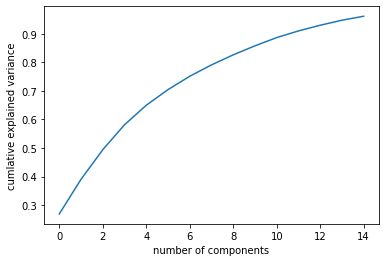

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [ ]:
c_1=np.cumsum(pca.explained_variance_ratio_)
c_1

array([0.26949735, 0.39071372, 0.49423741, 0.58152498, 0.64983086,
       0.70448364, 0.7512345 , 0.79107704, 0.82624614, 0.85781649,
       0.88661721, 0.90996651, 0.92985892, 0.94740046, 0.9613349 ])

# Feature 12

In [ ]:
pca = PCA(n_components=12)
principalComponents_anormal_12 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.26949735, 0.12121636, 0.1035237 , 0.08728757, 0.06830588,
       0.05465278, 0.04675086, 0.03984255, 0.0351691 , 0.03157035,
       0.02880072, 0.0233493 ])

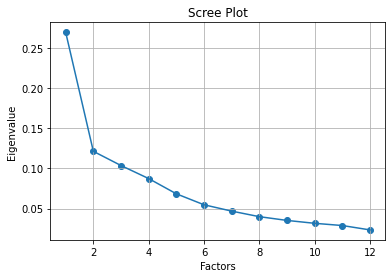

In [ ]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,13),importance)
plt.plot(range(1,13),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

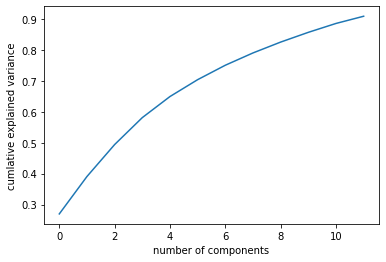

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [ ]:
d_1=np.cumsum(pca.explained_variance_ratio_)
d_1

array([0.26949735, 0.39071372, 0.49423741, 0.58152498, 0.64983086,
       0.70448364, 0.7512345 , 0.79107704, 0.82624614, 0.85781649,
       0.88661721, 0.90996651])

In [ ]:
# 9 Feature 

In [ ]:
pca = PCA(n_components=9)
principalComponents_anormal_9 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.26949735, 0.12121636, 0.1035237 , 0.08728757, 0.06830588,
       0.05465278, 0.04675086, 0.03984255, 0.0351691 ])

In [ ]:
print(principalComponents_normal_9.shape)

(700000, 9)


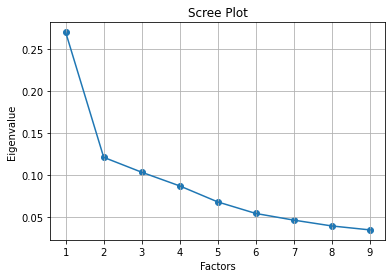

In [ ]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,10),importance)
plt.plot(range(1,10),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

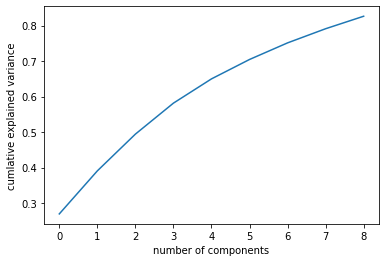

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [ ]:
e_1=np.cumsum(pca.explained_variance_ratio_)
e_1

array([0.26949735, 0.39071372, 0.49423741, 0.58152498, 0.64983086,
       0.70448364, 0.7512345 , 0.79107704, 0.82624614])

# PCA Dimensionality Reduciton _Anormal Data and KNN test 

# 1. PCA-29 FEature Dimensionality _ANoral Dataset 

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
PCA_29a=principalComponents_anormal_29

In [ ]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_29a_train, X_29a_test, y_3_train, y_3_test=train_test_split(PCA_29a, y_3, random_state=0)

In [ ]:
knn.fit(X_29a_train, y_3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
print("X_29a_train shape",X_29a_train.shape )
print("y_3_train shape",y_3_train.shape )
print("X_29a_test shape",X_29a_test.shape )
print("y_3_test shape",y_3_test.shape )

X_29a_train shape (16661, 29)
y_3_train shape (16661, 9)
X_29a_test shape (5554, 29)
y_3_test shape (5554, 9)


In [ ]:
y_pred=knn.predict(X_29a_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean(y_pred==y_3_test)))

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test score:0.9529


In [ ]:
print(classification_report(y_3_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1292
           1       0.77      0.08      0.14       129
           2       0.00      0.00      0.00       136
           3       0.41      0.04      0.07       279
           4       0.82      0.63      0.72      1377
           5       0.99      0.90      0.94      1832
           6       0.68      0.62      0.64       452
           7       0.33      0.02      0.04        50
           8       0.00      0.00      0.00         7

   micro avg       0.87      0.67      0.76      5554
   macro avg       0.54      0.33      0.37      5554
weighted avg       0.82      0.67      0.73      5554
 samples avg       0.67      0.67      0.67      5554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2 PCA-19 Anormal Feature 

In [ ]:
PCA_19a=principalComponents_anormal_19

In [ ]:
y_3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_19a_train, X_19a_test, y_3_train, y_3_test=train_test_split(PCA_19a, y_3, random_state=0)

In [ ]:
print("X_19a_train shape",X_19a_train.shape )
print("y_3_train shape",y_3_train.shape )

X_19a_train shape (16661, 19)
y_3_train shape (16661, 9)


In [ ]:
print("X_19a_test shape",X_19a_test.shape )
print("y_3_test shape",y_3_test.shape )

X_19a_test shape (5554, 19)
y_3_test shape (5554, 9)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)

In [ ]:
knn.fit(X_19a_train, y_3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(X_19a_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print("Test score:{:.4f}".format(np.mean(y_pred==y_3_test)))

Test score:0.9523


In [ ]:
print(classification_report(y_3_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76      1292
           1       0.86      0.09      0.17       129
           2       0.00      0.00      0.00       136
           3       0.37      0.05      0.08       279
           4       0.82      0.64      0.72      1377
           5       0.99      0.90      0.94      1832
           6       0.68      0.62      0.65       452
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         7

   micro avg       0.87      0.67      0.76      5554
   macro avg       0.50      0.33      0.37      5554
weighted avg       0.81      0.67      0.73      5554
 samples avg       0.67      0.67      0.67      5554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3 PCA -15 FEATURE Anoraml Dataset 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
PCA_15a=principalComponents_anormal_15

In [ ]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_15a_train, X_15a_test, y_3_train, y_3_test=train_test_split(PCA_15a, y_3, random_state=0)

In [ ]:
print("X_15a_train shape",X_15a_train.shape )
print("y_3_train shape",y_3_train.shape )
print("X_15a_test shape",X_15a_test.shape )
print("y_3_test shape",y_3_test.shape )

X_15a_train shape (16661, 15)
y_3_train shape (16661, 9)
X_15a_test shape (5554, 15)
y_3_test shape (5554, 9)


In [ ]:
knn.fit(X_15a_train, y_3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(X_15a_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean(y_pred==y_3_test)))

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test score:0.9522


In [ ]:
print(classification_report(y_3_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75      1292
           1       0.92      0.09      0.17       129
           2       0.00      0.00      0.00       136
           3       0.41      0.05      0.09       279
           4       0.82      0.65      0.72      1377
           5       0.98      0.90      0.94      1832
           6       0.69      0.62      0.65       452
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         7

   micro avg       0.87      0.67      0.76      5554
   macro avg       0.52      0.33      0.37      5554
weighted avg       0.82      0.67      0.72      5554
 samples avg       0.67      0.67      0.67      5554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#PCA 12 Features ANormal Dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
PCA_12a=principalComponents_anormal_12

In [ ]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_12a_train, X_12a_test, y_3_train, y_3_test=train_test_split(PCA_12a, y_3, random_state=0)

In [ ]:
knn.fit(X_12a_train, y_3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(X_12a_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean(y_pred==y_3_test)))

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test score:0.9513


In [ ]:
print(classification_report(y_3_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.69      0.74      1292
           1       0.77      0.08      0.14       129
           2       0.00      0.00      0.00       136
           3       0.38      0.05      0.09       279
           4       0.82      0.64      0.72      1377
           5       0.98      0.89      0.94      1832
           6       0.69      0.59      0.63       452
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         7

   micro avg       0.87      0.67      0.75      5554
   macro avg       0.50      0.33      0.36      5554
weighted avg       0.81      0.67      0.72      5554
 samples avg       0.67      0.67      0.67      5554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4. PCA 9 Feature Anormal dataset 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
PCA_9a=principalComponents_anormal_9

In [ ]:
# Split the anoraml dataset into training_test 
from sklearn.model_selection import train_test_split
X_9a_train, X_9a_test, y_3_train, y_3_test=train_test_split(PCA_9a, y_3, random_state=0)

In [ ]:
knn.fit(X_9a_train, y_3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(X_9a_test)
print("Test set predictions:\n", y_pred)
print("Test score:{:.4f}".format(np.mean(y_pred==y_3_test)))

Test set predictions:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test score:0.9503


In [ ]:
print(classification_report(y_3_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73      1292
           1       0.50      0.05      0.09       129
           2       0.00      0.00      0.00       136
           3       0.40      0.05      0.09       279
           4       0.81      0.64      0.71      1377
           5       0.98      0.90      0.94      1832
           6       0.69      0.58      0.63       452
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         7

   micro avg       0.86      0.66      0.75      5554
   macro avg       0.46      0.32      0.35      5554
weighted avg       0.80      0.66      0.71      5554
 samples avg       0.66      0.66      0.66      5554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PCA Dimensionality Reduction Stack ( axis=0) Normal+Anormal

In [ ]:
# 29 Feature Stack 

In [ ]:
PCA_29=np.concatenate((principalComponents_normal_29, principalComponents_anormal_29 ),axis=0)

In [ ]:
PCA_29

array([[-2.11086657e+00,  1.85547879e-01, -2.50178214e-01, ...,
        -7.09204378e-03, -4.11584263e-04, -1.00654571e-03],
       [-1.63803611e+00, -6.83859317e-01, -5.02861060e-01, ...,
         8.41725071e-03, -3.45003828e-04, -2.29477450e-03],
       [-1.92929948e+00, -9.31889627e-02, -4.63615737e-01, ...,
         6.90228512e-03, -2.14415353e-04, -1.45158064e-03],
       ...,
       [ 1.73269485e+00, -9.66528689e-01,  6.88435846e-02, ...,
         6.89942634e-03, -6.85546848e-03, -1.10344119e-03],
       [ 4.58714073e-01, -3.66405189e-01,  5.64025844e-02, ...,
         8.41277806e-03, -6.74674663e-03, -8.61648923e-04],
       [ 3.53662716e+00, -2.28444231e+00, -2.11015480e-01, ...,
        -2.41484630e-03, -5.64933762e-03, -8.88427164e-04]])

In [ ]:
print(PCA_29.shape)

(722215, 29)


In [ ]:
# 19 Feature Stack 

In [ ]:
PCA_19=np.concatenate((principalComponents_normal_19, principalComponents_anormal_19 ),axis=0)

In [ ]:
PCA_19

array([[-2.11086657,  0.18554788, -0.25017821, ...,  0.46115558,
         0.07689443, -0.2665604 ],
       [-1.63803611, -0.68385932, -0.50286106, ...,  0.27830778,
         0.19643922, -0.40613206],
       [-1.92929948, -0.09318896, -0.46361574, ...,  0.27048848,
         0.17816248, -0.36004142],
       ...,
       [ 1.73269485, -0.96652869,  0.06884358, ...,  0.19236619,
         0.02756408,  0.04881167],
       [ 0.45871407, -0.36640519,  0.05640258, ...,  0.72718679,
         0.22425884, -0.13341686],
       [ 3.53662716, -2.28444231, -0.21101548, ..., -0.98892134,
        -0.39603791,  0.1449    ]])

In [ ]:
## 15 Feature Stack 

In [ ]:
PCA_15=np.concatenate((principalComponents_normal_15, principalComponents_anormal_15 ),axis=0)

In [ ]:
# 12 Feature Stack 

In [ ]:
PCA_12=np.concatenate((principalComponents_normal_12, principalComponents_anormal_12 ),axis=0)

In [ ]:
## 9 Feature Stack 

In [ ]:
PCA_9=np.concatenate((principalComponents_normal_9, principalComponents_anormal_9 ),axis=0)

In [ ]:
# Target stack

In [ ]:
y=np.concatenate((y_1,y_2),axis=0)

In [ ]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

# Split the reduction data into training, test

In [ ]:
# 29 PCA Dataset split 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_29F_train, X_29F_test, y_train, y_test=train_test_split(PCA_29,y, random_state=0)

In [ ]:
print("X_29F_train shape",X_29F_train.shape )
print("y_train shape",y_train.shape )

X_29F_train shape (541661, 29)
y_train shape (541661, 10)


In [ ]:
print("X_29F_test shape",X_29F_test.shape )
print("y_train shape",y_test.shape )

X_29F_test shape (180554, 29)
y_train shape (180554, 10)


In [ ]:
# 19 PCA Dataset split 
X_19F_train, X_19F_test, y_train, y_test=train_test_split(PCA_19,y, random_state=0)
print("X_19F_train shape",X_19F_train.shape )
print("y_train shape",y_train.shape )
print("X_19F_test shape",X_19F_test.shape )
print("y_train shape",y_test.shape )

X_19F_train shape (541661, 19)
y_train shape (541661, 10)
X_19F_test shape (180554, 19)
y_train shape (180554, 10)


In [ ]:
# 15 PCA Dataset split 
X_15F_train, X_15F_test, y_train, y_test=train_test_split(PCA_15,y, random_state=0)
print("X_15F_train shape",X_15F_train.shape )
print("y_train shape",y_train.shape )
print("X_15F_test shape",X_15F_test.shape )
print("y_train shape",y_test.shape )

X_15F_train shape (541661, 15)
y_train shape (541661, 10)
X_15F_test shape (180554, 15)
y_train shape (180554, 10)


In [ ]:
# 12 PCA Dataset split 
X_12F_train, X_12F_test, y_train, y_test=train_test_split(PCA_12,y, random_state=42)
print("X_12F_train shape",X_12F_train.shape )
print("y_train shape",y_train.shape )
print("X_12F_test shape",X_12F_test.shape )
print("y_train shape",y_test.shape )

X_12F_train shape (541661, 12)
y_train shape (541661, 10)
X_12F_test shape (180554, 12)
y_train shape (180554, 10)


In [ ]:
# 9 PCA Dataset split 
X_9F_train, X_9F_test, y_train, y_test=train_test_split(PCA_9,y, random_state=0)
print("X_9F_train shape",X_9F_train.shape )
print("y_train shape",y_train.shape )
print("X_9F_test shape",X_9F_test.shape )
print("y_train shape",y_test.shape )

X_9F_train shape (541661, 9)
y_train shape (541661, 10)
X_9F_test shape (180554, 9)
y_train shape (180554, 10)


# Traing Model KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)

# 29  Feature Concated Dataset test 

In [ ]:
knn.fit(X_29F_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

# Evaluating the model 

In [ ]:
y_pred=knn.predict(X_29F_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
print("Test score:{:.4f}".format(np.mean(y_pred==y_test)))

Test score:0.9986


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169406
           1       0.76      0.56      0.64      2564
           2       0.62      0.02      0.03       281
           3       0.00      0.00      0.00       259
           4       0.41      0.05      0.09       555
           5       0.81      0.61      0.70      2762
           6       0.99      0.92      0.95      3739
           7       0.71      0.61      0.66       863
           8       1.00      0.03      0.05       112
           9       0.00      0.00      0.00        13

   micro avg       0.99      0.98      0.98    180554
   macro avg       0.63      0.38      0.41    180554
weighted avg       0.99      0.98      0.98    180554
 samples avg       0.98      0.98      0.98    180554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 19 Feature  Concated Complete dataset

In [ ]:
knn.fit(X_19F_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(X_19F_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
print("Test score:{:.4f}".format(np.mean(y_pred==y_test)))

Test score:0.9967


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169406
           1       0.76      0.56      0.64      2564
           2       0.60      0.02      0.04       281
           3       0.00      0.00      0.00       259
           4       0.41      0.06      0.10       555
           5       0.81      0.62      0.70      2762
           6       0.99      0.91      0.95      3739
           7       0.72      0.62      0.67       863
           8       0.75      0.03      0.05       112
           9       0.00      0.00      0.00        13

   micro avg       0.99      0.98      0.98    180554
   macro avg       0.60      0.38      0.41    180554
weighted avg       0.99      0.98      0.98    180554
 samples avg       0.98      0.98      0.98    180554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 15 Feature Complete dataset

In [ ]:
knn.fit(X_15F_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(X_15F_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
print("Test score:{:.4f}".format(np.mean(y_pred==y_test)))

Test score:0.9966


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169406
           1       0.73      0.54      0.62      2564
           2       0.55      0.02      0.04       281
           3       0.00      0.00      0.00       259
           4       0.43      0.05      0.10       555
           5       0.80      0.62      0.70      2762
           6       0.98      0.91      0.94      3739
           7       0.71      0.61      0.66       863
           8       0.67      0.04      0.07       112
           9       0.00      0.00      0.00        13

   micro avg       0.99      0.98      0.98    180554
   macro avg       0.59      0.38      0.41    180554
weighted avg       0.98      0.98      0.98    180554
 samples avg       0.98      0.98      0.98    180554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 12 Features Concated Features

In [ ]:
knn.fit(X_12F_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(X_12F_test)

In [ ]:
print("Test score:{:.4f}".format(np.mean(y_pred==y_test)))

Test score:0.9965


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169349
           1       0.72      0.55      0.62      2530
           2       0.73      0.04      0.08       274
           3       0.00      0.00      0.00       260
           4       0.47      0.05      0.10       560
           5       0.80      0.61      0.69      2771
           6       0.97      0.90      0.93      3819
           7       0.71      0.60      0.65       880
           8       0.50      0.03      0.06       103
           9       0.00      0.00      0.00         8

   micro avg       0.99      0.97      0.98    180554
   macro avg       0.59      0.38      0.41    180554
weighted avg       0.98      0.97      0.98    180554
 samples avg       0.97      0.97      0.97    180554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 9 Features Complete dataset

In [ ]:
knn.fit(X_9F_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn.predict(X_9F_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
print("Test score:{:.4f}".format(np.mean(y_pred==y_test)))

Test score:0.9876


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    169349
           1       0.00      0.00      0.00      2530
           2       0.00      0.00      0.00       274
           3       0.00      0.00      0.00       260
           4       0.00      0.00      0.00       560
           5       0.00      0.00      0.00      2771
           6       0.00      0.00      0.00      3819
           7       0.00      0.00      0.00       880
           8       0.00      0.00      0.00       103
           9       0.00      0.00      0.00         8

   micro avg       0.94      0.94      0.94    180554
   macro avg       0.09      0.10      0.10    180554
weighted avg       0.88      0.94      0.91    180554
 samples avg       0.94      0.94      0.94    180554



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
